데이터의 양이 많지 않아 과적합이 쉽게 발생합니다.

과적합을 줄이기위한 데이터 증강 방법입니다.

학습 과정에서 데이터를 좌우로 무작위 이동시켜 데이터를 증강하면 과적합이 줄어드는 것을 확인할 수있습니다.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm
from glob import glob

In [2]:
path = '.'

In [3]:
train_features = pd.read_csv(path+'/data/train_features.csv')
train_labels = pd.read_csv(path+'/data/train_labels.csv')
test = pd.read_csv(path+'/data/test_features.csv')
sample_submission = pd.read_csv(path + '/data/sample_submission.csv')

In [4]:
train_features.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234


In [5]:
train_labels.head()

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise


In [6]:
test.head()

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912


In [7]:
x_train = []

for uid in tqdm(train_features['id'].unique()):
    temp = np.array(train_features[train_features['id'] == uid].iloc[:,2:], np.float32).T
    x_train.append(temp)

x_train = np.array(x_train, np.float32)
x_train = x_train[:,:,:,np.newaxis]

x_test = []

for uid in tqdm(test['id'].unique()):
    temp = np.array(test[test['id'] == uid].iloc[:,2:], np.float32).T
    x_test.append(temp)

x_test = np.array(x_test, np.float32)
x_test = x_test[:,:,:,np.newaxis]

100%|██████████| 782/782 [00:00<00:00, 1245.86it/s]


In [8]:
def aug(data, uid, shift = 0):
    shift_data = np.roll(data, shift, axis=2)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(data[uid][0,:,0])
    plt.plot(data[uid][1,:,0])
    plt.plot(data[uid][2,:,0])
    plt.subplot(122)
    plt.plot(shift_data[uid][0,:,0])
    plt.plot(shift_data[uid][1,:,0])
    plt.plot(shift_data[uid][2,:,0])
    plt.axvline(shift, color='red')
    plt.show()
    
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(data[uid][3,:,0])
    plt.plot(data[uid][4,:,0])
    plt.plot(data[uid][5,:,0])
    plt.subplot(122)
    plt.plot(shift_data[uid][3,:,0])
    plt.plot(shift_data[uid][4,:,0])
    plt.plot(shift_data[uid][5,:,0])
    plt.axvline(shift, color='red')
    plt.show()

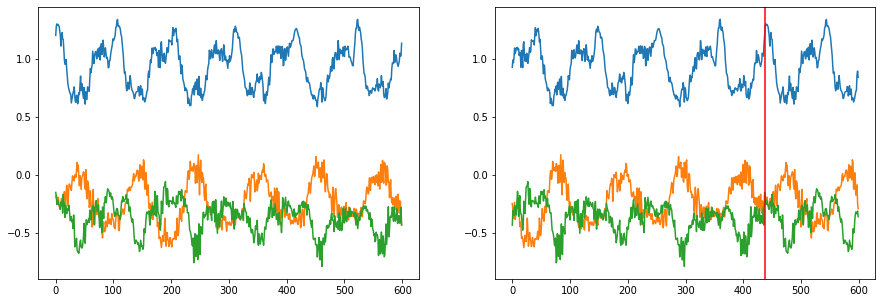

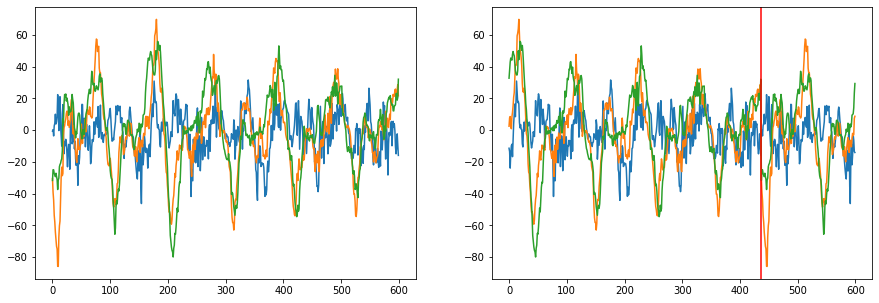

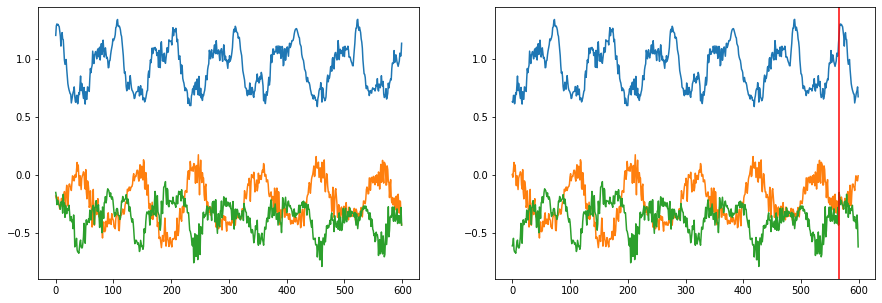

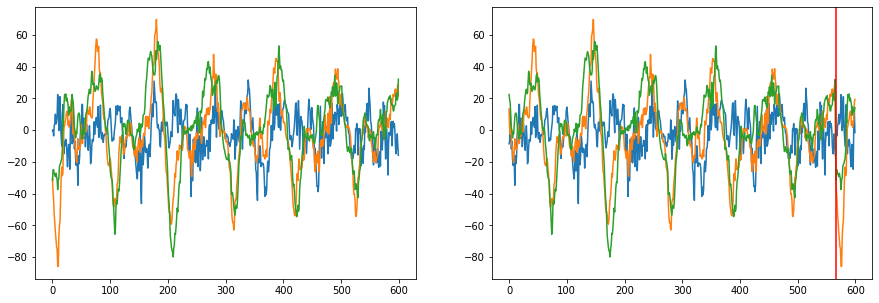

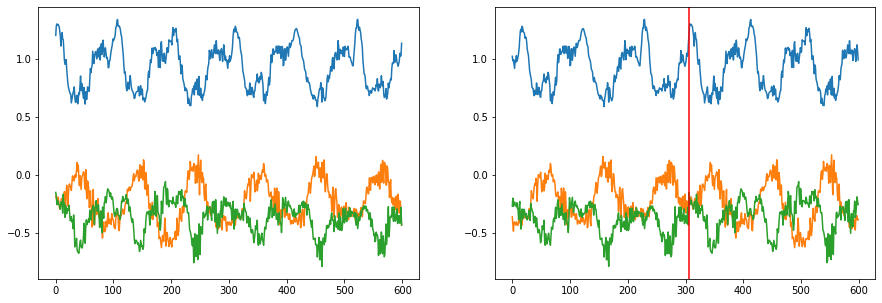

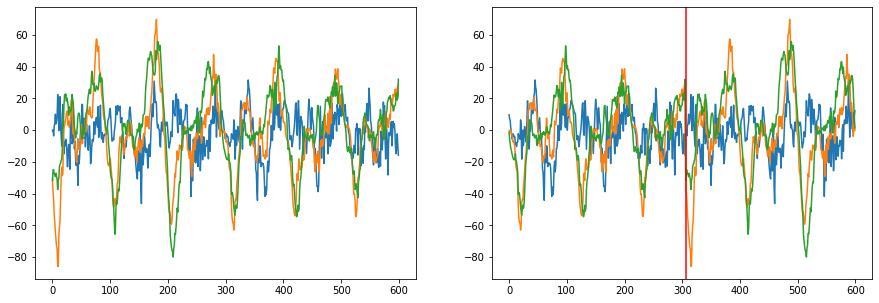

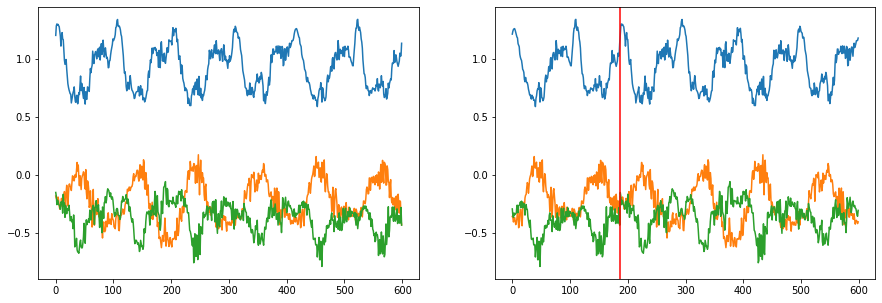

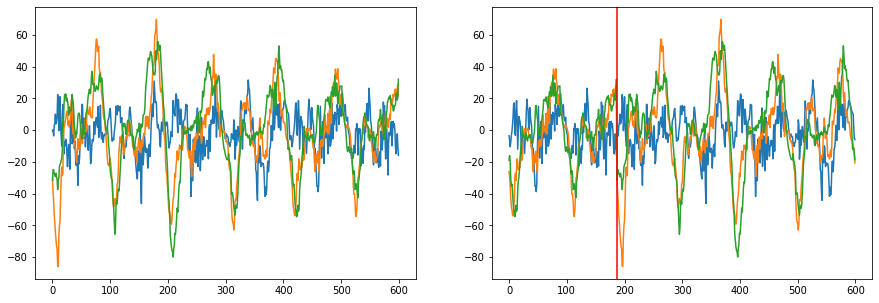

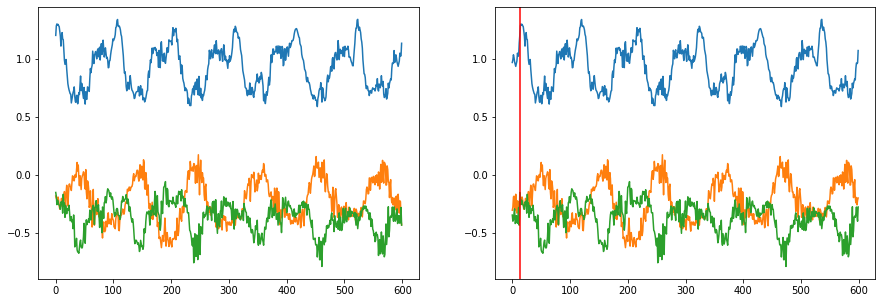

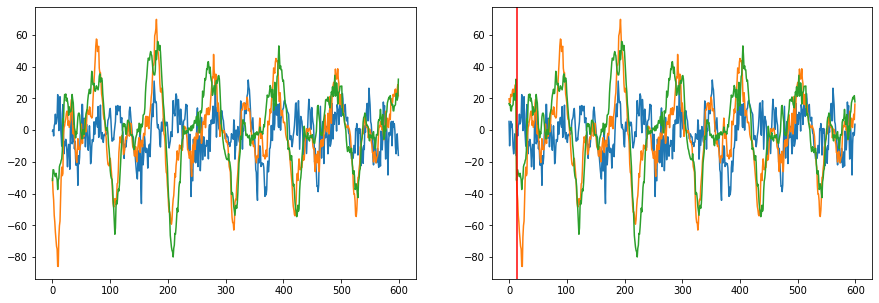

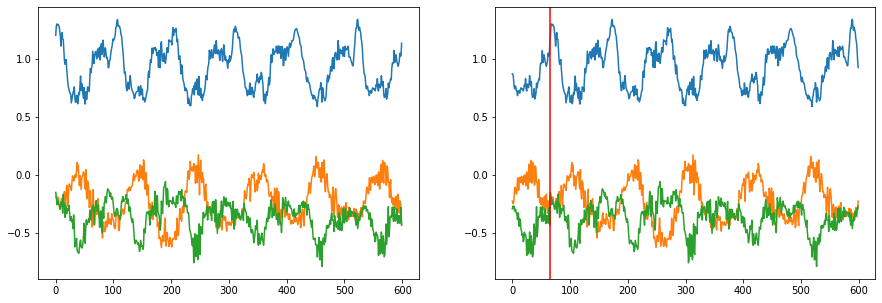

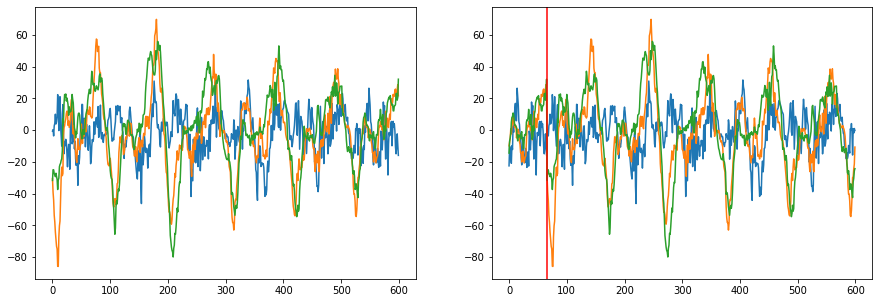

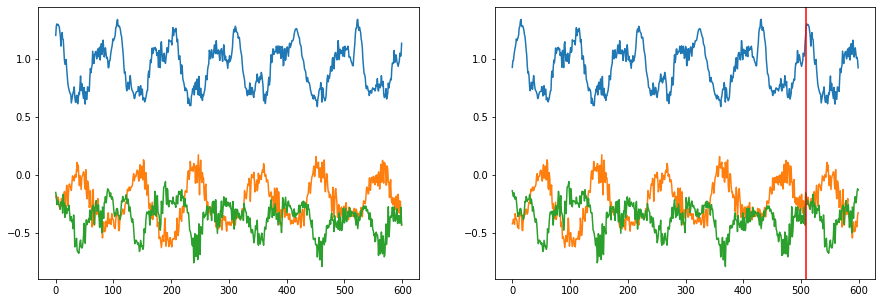

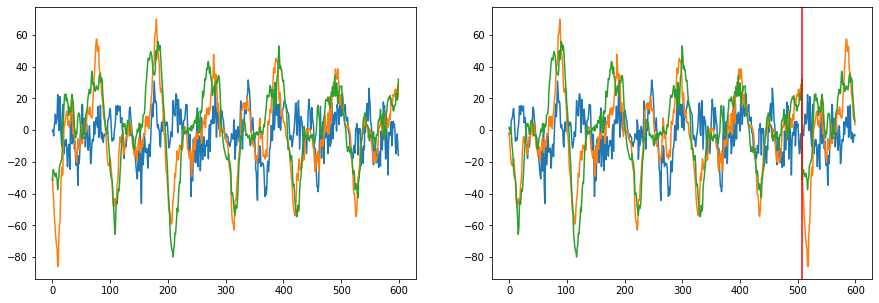

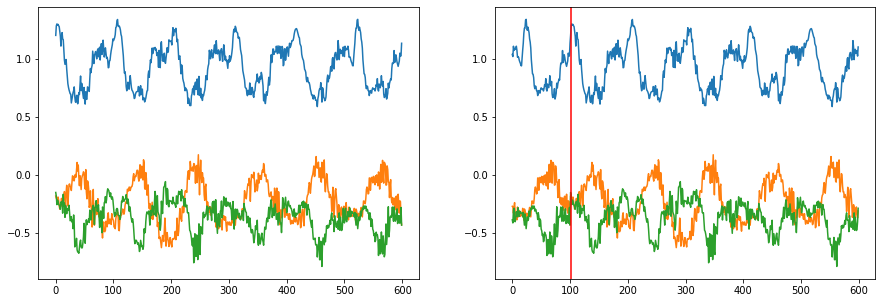

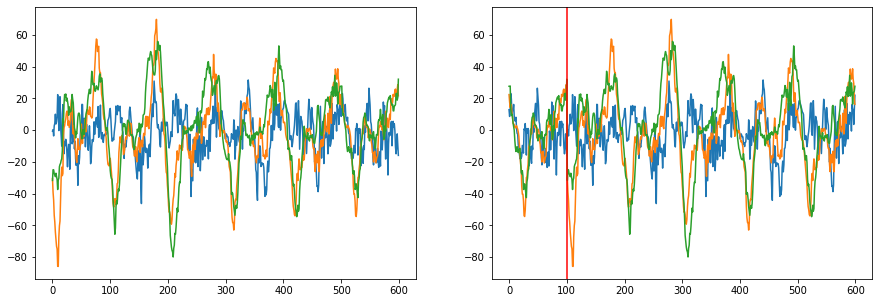

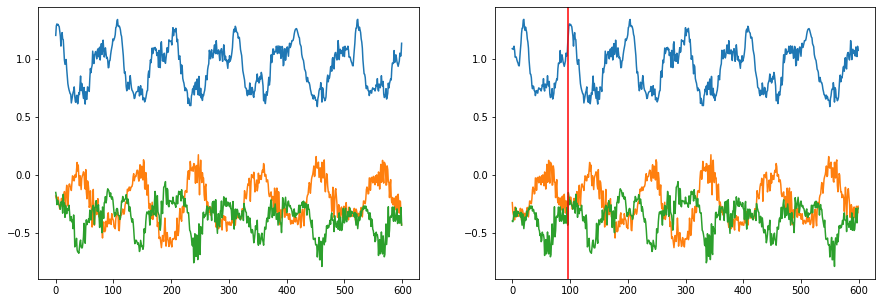

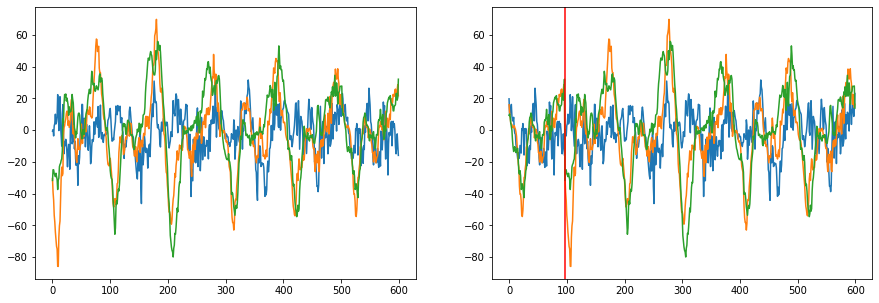

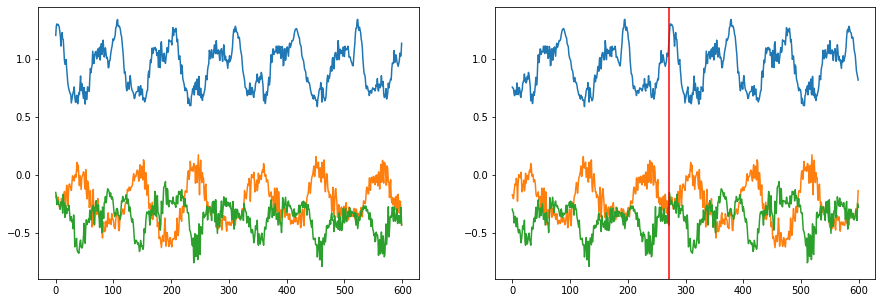

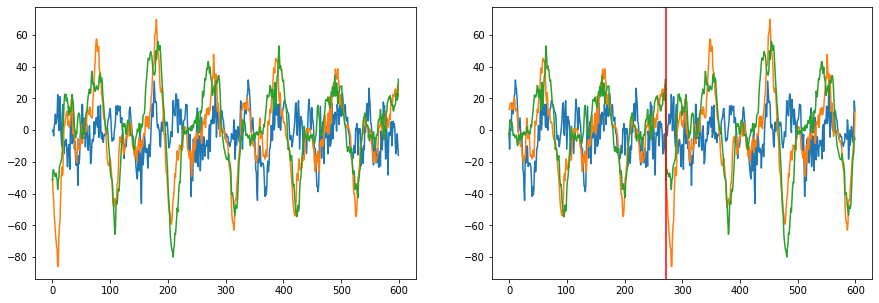

In [9]:
for _ in range(10):
    aug(x_train, 0, int(random.random()*600))
    print('')